<a href="https://colab.research.google.com/github/wanguiwaweru/Cyberbullying-detection/blob/main/CyberBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 26.8 MB/s 
     |████████████████████████████████| 115 kB 64.7 MB/s 
     |████████████████████████████████| 163 kB 70.4 MB/s 
     |████████████████████████████████| 212 kB 70.8 MB/s 
     |████████████████████████████████| 127 kB 62.9 MB/s 
     |████████████████████████████████| 115 kB 60.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 25.5 MB/s 
     |████████████████████████████████| 7.6 MB 49.2 MB/s 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_dataset.csv to final_dataset.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import datasets
from datasets import Dataset, DatasetDict

In [ ]:
df = pd.read_csv("final_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62586 entries, 0 to 62585
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             62586 non-null  object
 1   Tweet          62584 non-null  object
 2   Cyberbullying  62586 non-null  int64 
 3   Insult         62586 non-null  int64 
 4   Profanity      62586 non-null  int64 
 5   Sarcasm        62586 non-null  int64 
 6   Threat         62586 non-null  int64 
 7   Exclusion      62586 non-null  int64 
 8   Pornography    62586 non-null  int64 
 9   Spam           62586 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 4.8+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.shape

(62586, 10)

In [ ]:
df.head()

,Id,Tweet,Cyberbullying,Insult,Profanity,Sarcasm,Threat,Exclusion,Pornography,Spam
0,'1134395760844427264,seriously i think it is a grave fault in life ...,0,0,0,0,0,0,0,0
1,'1132686520333283329,i hate when people stick up for people who are...,0,0,1,0,0,0,0,0
2,'1132731795945009154,correction nigga is,0,0,1,0,0,0,0,0
3,'1135066181386342401,a reminder that this catholic man is a cunt,0,0,1,0,0,0,0,0
4,'1133413785018834944,horny cum cock dick wank sugar baby form fos re,0,0,1,0,0,0,1,1


In [ ]:
df.describe()

,Cyberbullying,Insult,Profanity,Sarcasm,Threat,Exclusion,Pornography,Spam
count,62586.000000,62586.000000,62586.000000,62586.000000,62586.000000,62586.00000,62586.000000,62586.000000
mean,0.051992,0.242914,0.815086,0.001869,0.001262,0.00016,0.266545,0.236778
std,0.222014,0.428847,0.388231,0.043197,0.035506,0.01264,0.442156,0.425108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df_toxic = df.drop(['Id', 'Tweet'], axis=1)
counts = []
categories = list(df_toxic.columns.values)
for i in categories:
    counts.append((i, df_toxic[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

,category,number_of_comments
0,Cyberbullying,3254
1,Insult,15203
2,Profanity,51013
3,Sarcasm,117
4,Threat,79
5,Exclusion,10
6,Pornography,16682
7,Spam,14819


Text(0.5, 0, 'category')

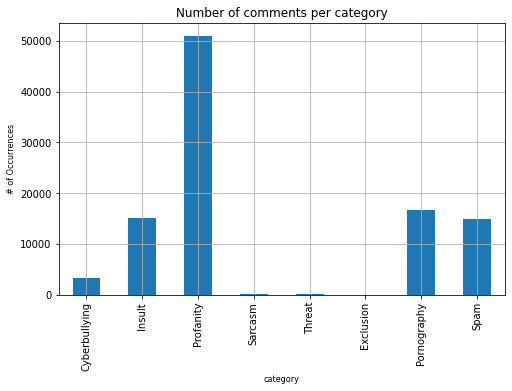

In [ ]:
df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=8)
plt.xlabel('category', fontsize=8)

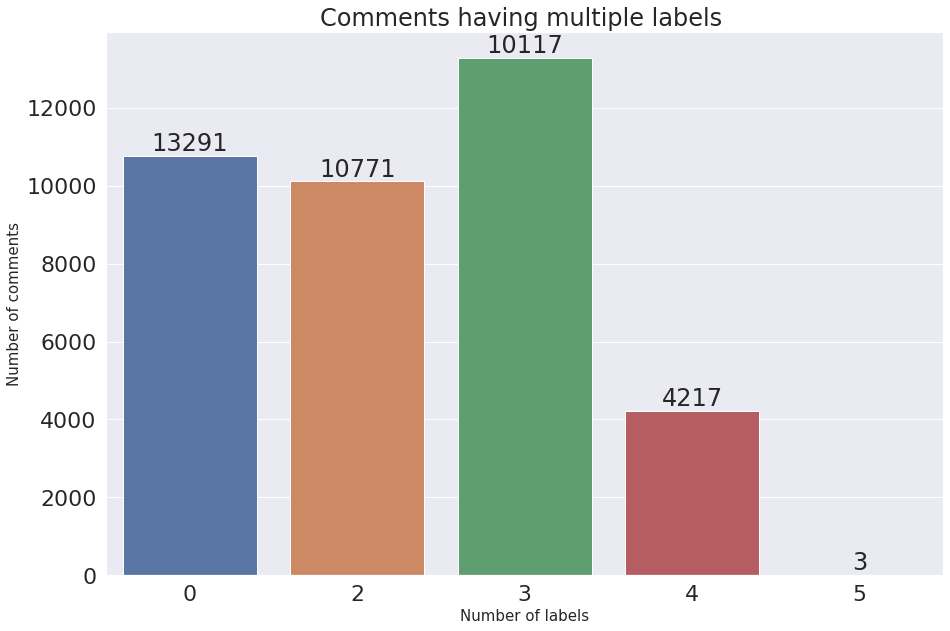

In [ ]:
rowSums = df.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,10))

ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=15)
plt.xlabel('Number of labels', fontsize=15)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [ ]:
train,test = train_test_split(df, train_size=0.7, random_state=42)

print(train.shape)
print(test.shape)

(43810, 10)
(18776, 10)


In [ ]:
df_train = train.drop(['Id', 'Tweet'], axis=1)
counts = []
categories = list(df_train.columns.values)
for i in categories:
    counts.append((i, df_train[i].sum()))
df_stat = pd.DataFrame(counts, columns=['category', 'total'])
df_stat

,category,total
0,Cyberbullying,2311
1,Insult,10634
2,Profanity,35717
3,Sarcasm,83
4,Threat,59
5,Exclusion,8
6,Pornography,11677
7,Spam,10358


In [ ]:
num_tweets = df_train.Cyberbullying.sum()
print(num_tweets)


2311


In [ ]:
balanced_df = pd.DataFrame(columns = ['Id', 'Tweet', 'Cyberbullying', 'Insult', 'Profanity', 'Sarcasm', 'Threat', 'Exclusion', 'Pornography', 'Spam'])
balanced_df

,Id,Tweet,Cyberbullying,Insult,Profanity,Sarcasm,Threat,Exclusion,Pornography,Spam


In [ ]:
balanced_df['Cyberbullying'] = df_train.sample(num_tweets)
balanced_df['Insult'] = df_train.sample(num_tweets)
balanced_df['Profanity'] = df_train.sample(num_tweets)
balanced_df['Sarcasm'] = df_train.sample(num_tweets)
balanced_df['Threat'] = df_train.sample(num_tweets)
balanced_df['Exclusion'] = df_train.sample(num_tweets)
balanced_df['Pornography'] = df_train.sample(num_tweets)
balanced_df['Spam'] = df_train.sample(num_tweets)

In [ ]:
df_test = test.drop(['Id', 'Tweet'], axis=1)
counts = []
categories = list(df_test.columns.values)
for i in categories:
    counts.append((i, df_test[i].sum()))
df_sta = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_sta

,category,number_of_comments
0,Cyberbullying,943
1,Insult,4569
2,Profanity,15296
3,Sarcasm,34
4,Threat,20
5,Exclusion,2
6,Pornography,5005
7,Spam,4461


In [ ]:
train.head()

,Id,Tweet,Cyberbullying,Insult,Profanity,Sarcasm,Threat,Exclusion,Pornography,Spam
12980,'1132858492069515265,g spot porn pics from mallu bodybuilding free ...,0,0,1,0,0,0,1,1
57202,'1132994743686893568,i was actually scanning the shit lookin for a ...,0,0,1,0,0,0,0,0
50469,'1132990070535987201,im horny omg watch,0,0,1,0,0,0,0,0
34176,'1132703359574654979,i got some big ass thighs like why,0,0,1,0,0,0,0,0
27581,'1132728574862135296,pay attention baby girl that nigga dont respec...,0,1,1,0,0,0,0,0


In [ ]:
train = train.dropna()
test = test.dropna()

In [ ]:
train = Dataset.from_pandas(train)
test = Dataset.from_pandas(test)

dataset = DatasetDict()

dataset['train'] = train
dataset['test'] = test

dataset = dataset.remove_columns(["__index_level_0__"])
dataset

DatasetDict({
    train: Dataset({
        features: ['Id', 'Tweet', 'Cyberbullying', 'Insult', 'Profanity', 'Sarcasm', 'Threat', 'Exclusion', 'Pornography', 'Spam'],
        num_rows: 43808
    })
    test: Dataset({
        features: ['Id', 'Tweet', 'Cyberbullying', 'Insult', 'Profanity', 'Sarcasm', 'Threat', 'Exclusion', 'Pornography', 'Spam'],
        num_rows: 18776
    })
})

In [ ]:
example = dataset['train'][1]
example

{'Id': "'1132713672445386752",
 'Tweet': 'well said calling these folks snowflakes is an insult to snowflakes there has to be a',
 'Cyberbullying': 0,
 'Insult': 0,
 'Profanity': 0,
 'Sarcasm': 0,
 'Threat': 0,
 'Exclusion': 0,
 'Pornography': 0,
 'Spam': 0}

In [ ]:
labels = [label for label in dataset['train'].features.keys() if label not in ['Id', 'Tweet','__index_level_0__']]
print(labels)
id2label = {idx:label for idx, label in enumerate(labels)}
print(id2label)
label2id = {label:idx for idx, label in enumerate(labels)}
print(label2id)

['Cyberbullying', 'Insult', 'Profanity', 'Sarcasm', 'Threat', 'Exclusion', 'Pornography', 'Spam']
{0: 'Cyberbullying', 1: 'Insult', 2: 'Profanity', 3: 'Sarcasm', 4: 'Threat', 5: 'Exclusion', 6: 'Pornography', 7: 'Spam'}
{'Cyberbullying': 0, 'Insult': 1, 'Profanity': 2, 'Sarcasm': 3, 'Threat': 4, 'Exclusion': 5, 'Pornography': 6, 'Spam': 7}


In [ ]:
from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def preprocess_data(examples):
  # take a batch of texts
  text = examples["Tweet"]
  # encode them
  encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
  # add labels
  labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
  # create numpy array of shape (batch_size, num_labels)
  labels_matrix = np.zeros((len(text), len(labels)))
  # fill numpy array
  for idx, label in enumerate(labels):
    labels_matrix[:, idx] = labels_batch[label]
    
  encoding["labels"] = labels_matrix.tolist()

  
  return encoding

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
encoded_dataset = dataset.map(preprocess_data, batched=True, remove_columns=dataset['train'].column_names)

  0%|          | 0/44 [00:00<?, ?ba/s]

  0%|          | 0/19 [00:00<?, ?ba/s]

In [ ]:
print(encoded_dataset.shape)

{'train': (43808, 4), 'test': (18776, 4)}


In [ ]:
example = encoded_dataset['train'][1]
print(example)

{'input_ids': [101, 1045, 2001, 2941, 13722, 1996, 4485, 2298, 2378, 2005, 1037, 4365, 8579, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
tokenizer.decode(example['input_ids'])

'[CLS] i was actually scanning the shit lookin for a damn crack [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [ ]:
example['labels']

[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
[id2label[idx] for idx, label in enumerate(example['labels']) if label == 1.0]

['Profanity']

In [ ]:
encoded_dataset.set_format("torch")

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", 
                                                           problem_type="multi_label_classification", 
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
batch_size = 10
metric_name = "f1"

In [ ]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    f"bert-finetuned-bullying detection",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=4,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    #push_to_hub=True,
)

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
import torch
    
# source: https://jesusleal.io/2021/04/21/Longformer-multilabel-classification/
def multi_label_metrics(predictions, labels, threshold=0.5):
    # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    # next, use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    # finally, compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, 
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds, 
        labels=p.label_ids)
    return result

In [ ]:
encoded_dataset['train'][0]['labels'].type()

'torch.FloatTensor'

In [ ]:
encoded_dataset['train']['input_ids'][0]

tensor([  101,  1043,  3962, 22555, 27263,  2015,  2013,  6670,  2226,  2303,
        25820,  2489, 22555,  2980,  2915,  1999,  6471,  6248,  9458,  6167,
         2075,  7916,  3566, 27830,  2015,  6261,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0])

In [ ]:
#forward pass
outputs = model(input_ids=encoded_dataset['train']['input_ids'][0].unsqueeze(0), labels=encoded_dataset['train'][0]['labels'].unsqueeze(0))
outputs

SequenceClassifierOutput(loss=tensor(0.7102, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), logits=tensor([[ 0.6707, -0.1879, -0.0391, -0.4057,  0.1015,  0.2932,  0.3098,  0.1415]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 43808
  Num Epochs = 4
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 17524
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.176000,0.167633,0.817065,0.867197,0.659991
2,0.149100,0.167030,0.826612,0.882665,0.659459
3,0.117000,0.191790,0.821102,0.881296,0.657382
4,0.090400,0.212918,0.818248,0.881042,0.650085


***** Running Evaluation *****
  Num examples = 18776
  Batch size = 10
Saving model checkpoint to bert-finetuned-bullying detection/checkpoint-4381
Configuration saved in bert-finetuned-bullying detection/checkpoint-4381/config.json
Model weights saved in bert-finetuned-bullying detection/checkpoint-4381/pytorch_model.bin
tokenizer config file saved in bert-finetuned-bullying detection/checkpoint-4381/tokenizer_config.json
Special tokens file saved in bert-finetuned-bullying detection/checkpoint-4381/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 18776
  Batch size = 10
Saving model checkpoint to bert-finetuned-bullying detection/checkpoint-8762
Configuration saved in bert-finetuned-bullying detection/checkpoint-8762/config.json
Model weights saved in bert-finetuned-bullying detection/checkpoint-8762/pytorch_model.bin
tokenizer config file saved in bert-finetuned-bullying detection/checkpoint-8762/tokenizer_config.json
Special tokens file saved in bert-finetun

TrainOutput(global_step=17524, training_loss=0.13649835164240576, metrics={'train_runtime': 4835.0593, 'train_samples_per_second': 36.242, 'train_steps_per_second': 3.624, 'total_flos': 1.1526990056914944e+16, 'train_loss': 0.13649835164240576, 'epoch': 4.0})

In [ ]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 18776
  Batch size = 10


{'eval_loss': 0.1670302003622055,
 'eval_f1': 0.8266116660416596,
 'eval_roc_auc': 0.8826649103366091,
 'eval_accuracy': 0.6594588836812952,
 'eval_runtime': 142.4082,
 'eval_samples_per_second': 131.846,
 'eval_steps_per_second': 13.187,
 'epoch': 4.0}

In [ ]:
trainer.save_model('cyberbert_model')

Saving model checkpoint to cyberbert_model
Configuration saved in cyberbert_model/config.json
Model weights saved in cyberbert_model/pytorch_model.bin
tokenizer config file saved in cyberbert_model/tokenizer_config.json
Special tokens file saved in cyberbert_model/special_tokens_map.json


In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './saved_model/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Configuration saved in ./saved_model/config.json


Saving model to ./saved_model/


Model weights saved in ./saved_model/pytorch_model.bin
tokenizer config file saved in ./saved_model/tokenizer_config.json
Special tokens file saved in ./saved_model/special_tokens_map.json


('./saved_model/tokenizer_config.json',
 './saved_model/special_tokens_map.json',
 './saved_model/vocab.txt',
 './saved_model/added_tokens.json')

In [ ]:
!cp -av ./saved_model/ "/content/drive/MyDrive/TieProject/"

cp: './saved_model/' and '/content/drive/MyDrive/TieProject/saved_model' are the same file


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/TieProject/

/content/drive/MyDrive/TieProject


In [ ]:
from transformers import BertTokenizer
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained('./saved_model')
tokenizer = BertTokenizer.from_pretrained('./saved_model')

loading configuration file ./saved_model/config.json
Model config BertConfig {
  "_name_or_path": "./saved_model",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Cyberbullying",
    "1": "Insult",
    "2": "Profanity",
    "3": "Sarcasm",
    "4": "Threat",
    "5": "Exclusion",
    "6": "Pornography",
    "7": "Spam"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Cyberbullying": 0,
    "Exclusion": 5,
    "Insult": 1,
    "Pornography": 6,
    "Profanity": 2,
    "Sarcasm": 3,
    "Spam": 7,
    "Threat": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "m

In [ ]:
def predictions(text):
  encoding = tokenizer(text, return_tensors="pt")
  encoding = {k: v.to(model.device) for k,v in encoding.items()}
  outputs = model(**encoding)
  print(outputs)
  logits = outputs.logits
  print(logits)
  sigmoid = torch.nn.Sigmoid()
  probs = sigmoid(logits.squeeze().cpu())
  predictions = np.zeros(probs.shape)
  print(probs)
  predictions[np.where(probs >= 0.5)] = 1
  # turn predicted id's into actual label names
  predicted_labels = [id2label[idx] for idx, label in enumerate(predictions) if label == 1.0]
  print(predicted_labels)
  return predicted_labels


In [ ]:
print(predictions("In other words your food was great"))


SequenceClassifierOutput(loss=None, logits=tensor([[-3.8331, -3.2882, -2.2862, -4.2313, -4.6123, -4.8208, -3.9255, -3.8259]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor([[-3.8331, -3.2882, -2.2862, -4.2313, -4.6123, -4.8208, -3.9255, -3.8259]],
       grad_fn=<AddmmBackward0>)
tensor([0.0212, 0.0360, 0.0923, 0.0143, 0.0098, 0.0080, 0.0194, 0.0213],
       grad_fn=<SigmoidBackward0>)
[]
[]
